# Crime in San Francisco - Summer 2014

## Introduction
This notebook was based on the given San Francisco 2014 Summer data. This data set contains information about:
- The Incident number of the case (IncidntNum)
- The types of crimes committed (Category)
- A short description (Descript)
- The day of week the crime was committed on (DayOfWeek)
- The date (Date)
- The precise time given in 24hr format (Time)
- The police district (PdDistrict)
- The resolution to the case (Resolution)
- The address of the incidence (Address)
- Positional data in the form of X-/Y-coordinates (X, Y, Location)
- The police detective who filed the incident report (PDId)

In this assignment I chose to focus on the following questions: 'Are certain days more crime-prone than others?' and 'Which Police District Deal With the Most Crime in Total?'.

## Getting Started

One of the first things I did was import the data and print it out for examination. This gave me a better idea of what information would be available to me. I also chose to convert the DayOfWeek column from the object type to categorical as well as convert the date column to datetime. This allows for easier timeseries plotting, while also keeping the order of labels for the DayOfWeek column. Time was split into Hour and Min.

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots()

sanfran = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
sanfran['DayOfWeek'] = pd.Categorical(sanfran['DayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
sanfran.reset_index(inplace=True)
sanfran['Date'] = pd.to_datetime(sanfran['Date'])
sanfran = sanfran.set_index('Date')

sanfranhr = sanfran.Time.str.split(':')
sanfran['Hour'] = sanfranhr.str[0].astype(int)
sanfran['Min'] = sanfranhr.str[1].astype(int)

### Top 5 Rows

In [211]:
print(sanfran.head(5)) 

            index  IncidntNum       Category                      Descript  \
Date                                                                         
2014-08-31      0   140734311          ARSON            ARSON OF A VEHICLE   
2014-08-31      1   140736317   NON-CRIMINAL                 LOST PROPERTY   
2014-08-31      2   146177923  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
2014-08-31      3   146177531  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
2014-08-31      4   140734220   NON-CRIMINAL                FOUND PROPERTY   

           DayOfWeek   Time PdDistrict Resolution                    Address  \
Date                                                                           
2014-08-31    Sunday  23:50    BAYVIEW       NONE  LOOMIS ST / INDUSTRIAL ST   
2014-08-31    Sunday  23:45    MISSION       NONE     400 Block of CASTRO ST   
2014-08-31    Sunday  23:30   SOUTHERN       NONE   1000 Block of MISSION ST   
2014-08-31    Sunday  23:30   RICHMOND       NONE    

### Column data types

In [212]:
print(sanfran.dtypes)

index            int64
IncidntNum       int64
Category        object
Descript        object
DayOfWeek     category
Time            object
PdDistrict      object
Resolution      object
Address         object
X              float64
Y              float64
Location        object
PdId             int64
Hour             int32
Min              int32
dtype: object


### All Crime Categories

In [213]:
print(sanfran.Category.unique())

['ARSON' 'NON-CRIMINAL' 'LARCENY/THEFT' 'DRUG/NARCOTIC'
 'DRIVING UNDER THE INFLUENCE' 'OTHER OFFENSES' 'TRESPASS' 'VEHICLE THEFT'
 'ASSAULT' 'FRAUD' 'SUSPICIOUS OCC' 'SECONDARY CODES' 'WEAPON LAWS'
 'MISSING PERSON' 'WARRANTS' 'ROBBERY' 'DRUNKENNESS' 'PROSTITUTION'
 'LIQUOR LAWS' 'KIDNAPPING' 'FAMILY OFFENSES' 'LOITERING'
 'DISORDERLY CONDUCT' 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BURGLARY'
 'SUICIDE' 'VANDALISM' 'STOLEN PROPERTY' 'RUNAWAY' 'GAMBLING' 'EXTORTION'
 'PORNOGRAPHY/OBSCENE MAT' 'BRIBERY']


## Visualizing the Data

After examining the columns of the crime data set, I wanted a general picture of how the number of crimes were distributed throughout the whole period. The following line plot shows the number of crimes reported on each day of the timeseries period.

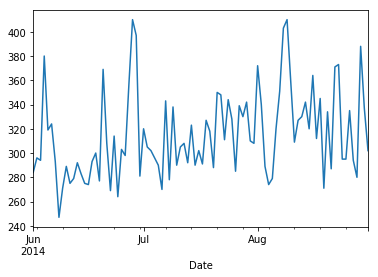

In [214]:
mostcrime_date = sanfran.groupby(['Date']).size()
mostcrime_date.plot.line()
plt.show()

One of the first things I made note of was some possible weekly seasonality of the data, as well as a slight upwards trend. I tried decomposing the timeseries into trend, seasonality and residuals in order to examine this further. The line plots below represent this decomposition.

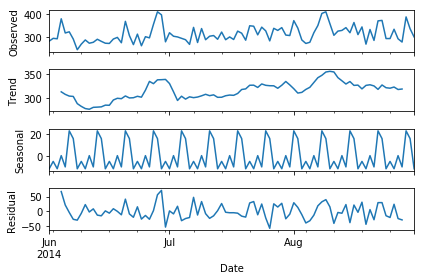

In [215]:
mostcrime_date_dec = seasonal_decompose(mostcrime_date, model='additive')
mostcrime_date_dec.plot()
plt.show()

Decomposing the timeseries into trend, seasonal and residual components revealed the suspected weekly seasonality. There is also the slight upward trend, but seeing as the period of time only covers three months, I would not draw any significance to it.

### Are certain days more crime-prone than others?
Going back to seasonality, if we look at the spikes, it would seem that the number of crimes tends to increase towards the end of the week. It is, however, not completely clear which days are most affected by this tendency. Continuing this thought I chose to plot the total number of crimes reported on each day of the week.

Total # of crimes for each week day


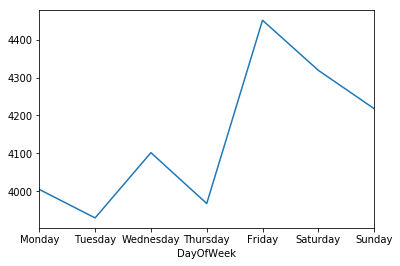

In [216]:
print('Total # of crimes for each week day')
mostcrime_day = sanfran.groupby(['DayOfWeek']).size()
mostcrime_day = mostcrime_day.sort_index()
mostcrime_day.plot.line()
plt.show()

Based on the line plot, it would seem that Friday is the day with the overall highest number of crime reports. But this doesn't give us the whole picture. From what we could see in the very first plot, a few days out of the whole period had a slightly larger spike than other days. Because of these possible outlier days, I chose to also plot the mean for each day of the week.

Mean # of crimes for each week day


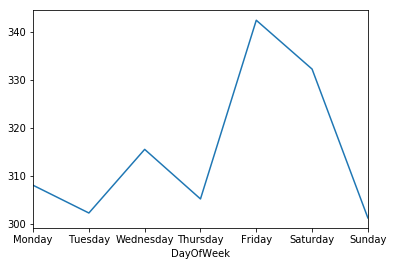

In [217]:

print('Mean # of crimes for each week day')
mostcrime_day = sanfran.groupby(['Date','DayOfWeek']).size()
mostcrime_day = mostcrime_day.reset_index(name='Counts')
mostcrime_day = mostcrime_day.groupby(['DayOfWeek']).Counts.mean()
mostcrime_day = mostcrime_day.sort_index()
mostcrime_day.plot.line()
plt.show()

This second line plot is also much closer to what we found previously in the seasonal component line plot. The conclusion is still the same, that Friday is the most crime-prone day of the period.

## Which Police District Deal With the Most Crime in Total?

For this question I chose to illustrate the total number of crimes per Police District in a simple bar chart.

Total sum of crimes associated with each district.


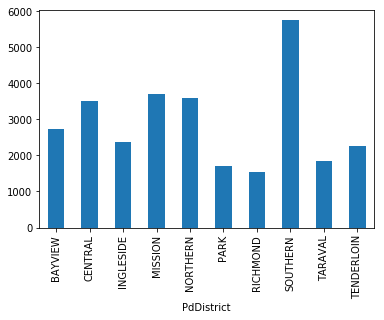

In [218]:
print("Total sum of crimes associated with each district.")
mostcrime_district = sanfran.groupby(['PdDistrict']).size()
mostcrime_district = mostcrime_district.sort_index()
mostcrime_district.plot.bar()
plt.show()

From this chart we can see that the Southern Police District deals with the most crime in total, while Richmond Police District deals with the least.